## Consumo Aparente da Indústria de Transformação - IPEA

Consumo aparente da indústria de transformação se refere à produção doméstica acrescida das importações e diminuída das exportações 

In [1]:
# Importando bibliotecas necessárias:

import requests # biblioteca para acessar e interagir com APIs e páginas da web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Bibliotecas para decomposição de séries:

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#Biblioteca para Análise de Estacionariedade por Teste de ADF

from statsmodels.tsa.stattools import adfuller

In [4]:
# Biblioteca para Geração de Gráfico de Função de Autocorrelação e Autocorrelação Parcial

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

### Carregamento dos dados que foram baixados do site do IPEA em formato csv, com separador ";"

In [5]:
#Importando arquivo csv (o separador é ;)

df_cons_apar = pd.read_csv("Dados/dados_consumo_aparente.csv", sep = ";")

# Exibição das primeiras linhas do DataFrame
df_cons_apar.head()

,Data,Consumo aparente - indústria de transformação - índice real (média 2012 = 100) - - - Instituto de Pesquisa Econômica Aplicada - GAC12_CAIT12,Consumo aparente - indústria de transformação - índice real dessazonalizado (média 2002 = 100) - - - Instituto de Pesquisa Econômica Aplicada - GAC12_CAITDESSAZ12,Unnamed: 3
0,1998.01,"65,7024886003063","73,5655734661517",NaN
1,1998.02,"62,9813598866376","74,3250707299816",NaN
2,1998.03,"75,9456985706684","74,7884633093983",NaN
3,1998.04,"72,0996051836264","74,2019145479575",NaN
4,1998.05,"76,9947931288222","75,4603282763991",NaN


In [6]:
#Remoção da coluna "Unnamed: 3"

df_cons_apar.drop("Unnamed: 3", axis = 1, inplace = True)

In [9]:
#Renomeando colunas:

df_cons_apar.columns = ["Data", "Consumo Aparente - Número índice", "Consumo Aparente Dessazonal - Número Índice"]

In [16]:
df_cons_apar.columns

Index(['Data', 'Consumo Aparente - Número índice',
       'Consumo Aparente Dessazonal - Número Índice',
       'Consumo Aparente - Var Mensal'],
      dtype='object')

In [13]:
#Conversão de dados em formato string para float:

df_cons_apar['Consumo Aparente - Número índice'] = df_cons_apar['Consumo Aparente - Número índice'].str.replace(',', '.').astype(float)
df_cons_apar['Consumo Aparente Dessazonal - Número Índice'] = df_cons_apar['Consumo Aparente Dessazonal - Número Índice'].str.replace(',', '.').astype(float)

In [15]:
# Criação de uma nova coluna com a variação percentual mensal da coluna "Consumo Aparente - Número índice"

df_cons_apar['Consumo Aparente - Var Mensal'] = df_cons_apar['Consumo Aparente - Número índice'].pct_change() * 100

In [18]:
# Criação de uma nova coluna com a variação percentual mensal da coluna "Consumo Aparente Dessazonalizado - Número índice"

df_cons_apar['Consumo Aparente Dessazonal - Var Mensal %'] = df_cons_apar['Consumo Aparente Dessazonal - Número Índice'].pct_change() * 100

In [20]:
#Remoção de linhas contendo NAN

df_cons_apar = df_cons_apar.dropna()

In [23]:
#Reset do índice numérico em ordem crescente

df_cons_apar.reset_index(inplace = True)

In [25]:
#Remoção da coluna index

df_cons_apar.drop("index", axis = 1, inplace = True)

C:\Users\prisc\AppData\Local\Temp\ipykernel_30668\4246829596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cons_apar.drop("index", axis = 1, inplace = True)


## Ajuste do formato de data para AAAA - MM - DD

In [22]:
#Download da biblioteca de formatação de data
from datetime import datetime

In [28]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '2/28/1998', 
                         end = '02/28/2025', 
                         freq = 'M')

In [29]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe da variação mensal da PIM-PF

len(date_rng) == len(df_cons_apar.index)

True

In [30]:
#Inclusão do dataframe date_rng no dataframe df_ipp_var

df_cons_apar.insert(0,        # coluna de indice 0
            'Mês',    # nome da nova coluna
            date_rng)  # dados

In [31]:
#Exclusão da coluna "Data"

df_cons_apar = df_cons_apar.drop(["Data"], axis = 1)

In [32]:
df_cons_apar

,Mês,Consumo Aparente - Número índice,Consumo Aparente Dessazonal - Número Índice,Consumo Aparente - Var Mensal,Consumo Aparente Dessazonal - Var Mensal %
0,1998-02-28,62.981360,74.325071,-4.141592,1.032409
1,1998-03-31,75.945699,74.788463,20.584406,0.623467
2,1998-04-30,72.099605,74.201915,-5.064268,-0.784277
3,1998-05-31,76.994793,75.460328,6.789480,1.695932
4,1998-06-30,76.415379,74.498122,-0.752537,-1.275115
...,...,...,...,...,...
320,2024-10-31,104.778050,95.481160,4.818552,2.727584
321,2024-11-30,91.236110,91.986390,-12.924405,-3.660167
322,2024-12-31,80.135030,91.137610,-12.167419,-0.922723
323,2025-01-31,85.654010,93.674320,6.887100,2.783384


## Consumo Aparente da Ind. Transformação - Variação Mensal % (sem ajuste sazonal)

### Gráficos da Série Temporal da Variação Mensal do Consumo Aparente (sem ajuste sazonal)

In [33]:
df_cons_apar.columns

Index(['Mês', 'Consumo Aparente - Número índice',
       'Consumo Aparente Dessazonal - Número Índice',
       'Consumo Aparente - Var Mensal',
       'Consumo Aparente Dessazonal - Var Mensal %'],
      dtype='object')

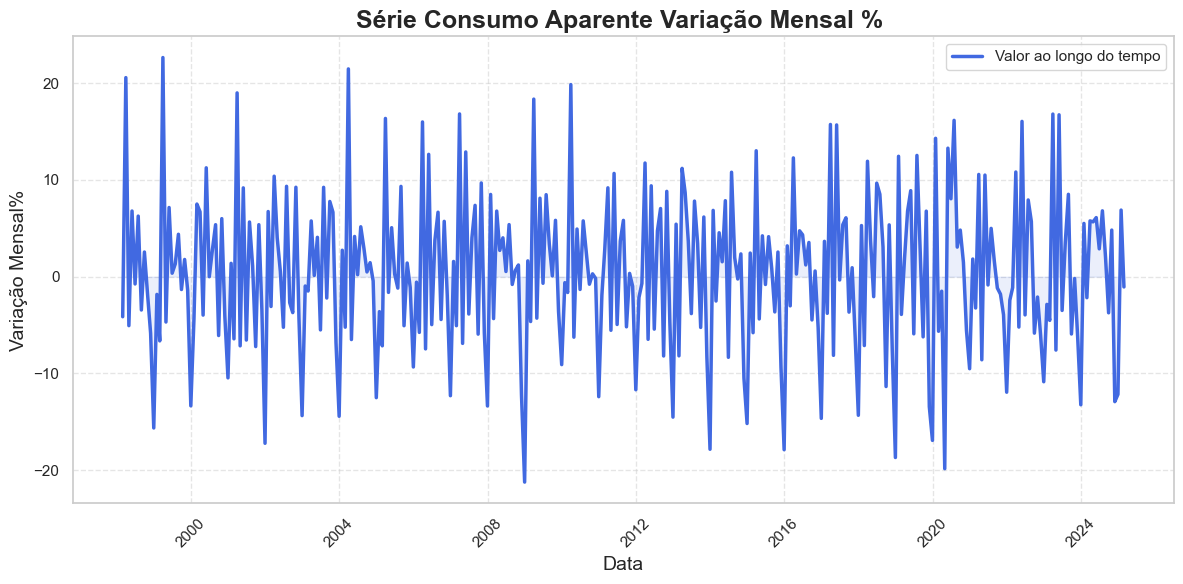

In [34]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_cons_apar["Mês"], df_cons_apar["Consumo Aparente - Var Mensal"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df_cons_apar["Mês"], df_cons_apar["Consumo Aparente - Var Mensal"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série Consumo Aparente Variação Mensal % ', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Avaliação de Estacionariedade da Série

In [35]:
#Teste de ADF - Variação Mensal do Consumo Aparente sem ajuste sazonal

resultado = adfuller(df_cons_apar["Consumo Aparente - Var Mensal"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -5.137975
p-value: 0.000012
Valores Críticos:
	1%: -3.452
	5%: -2.871
	10%: -2.572


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, se rejeita a hipótese nula de que a série do Consumo Paraente Variação Mensal (sem ajuste sazonal) não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [36]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_cons_apar["Consumo Aparente - Var Mensal"], model='additive', period = 12)

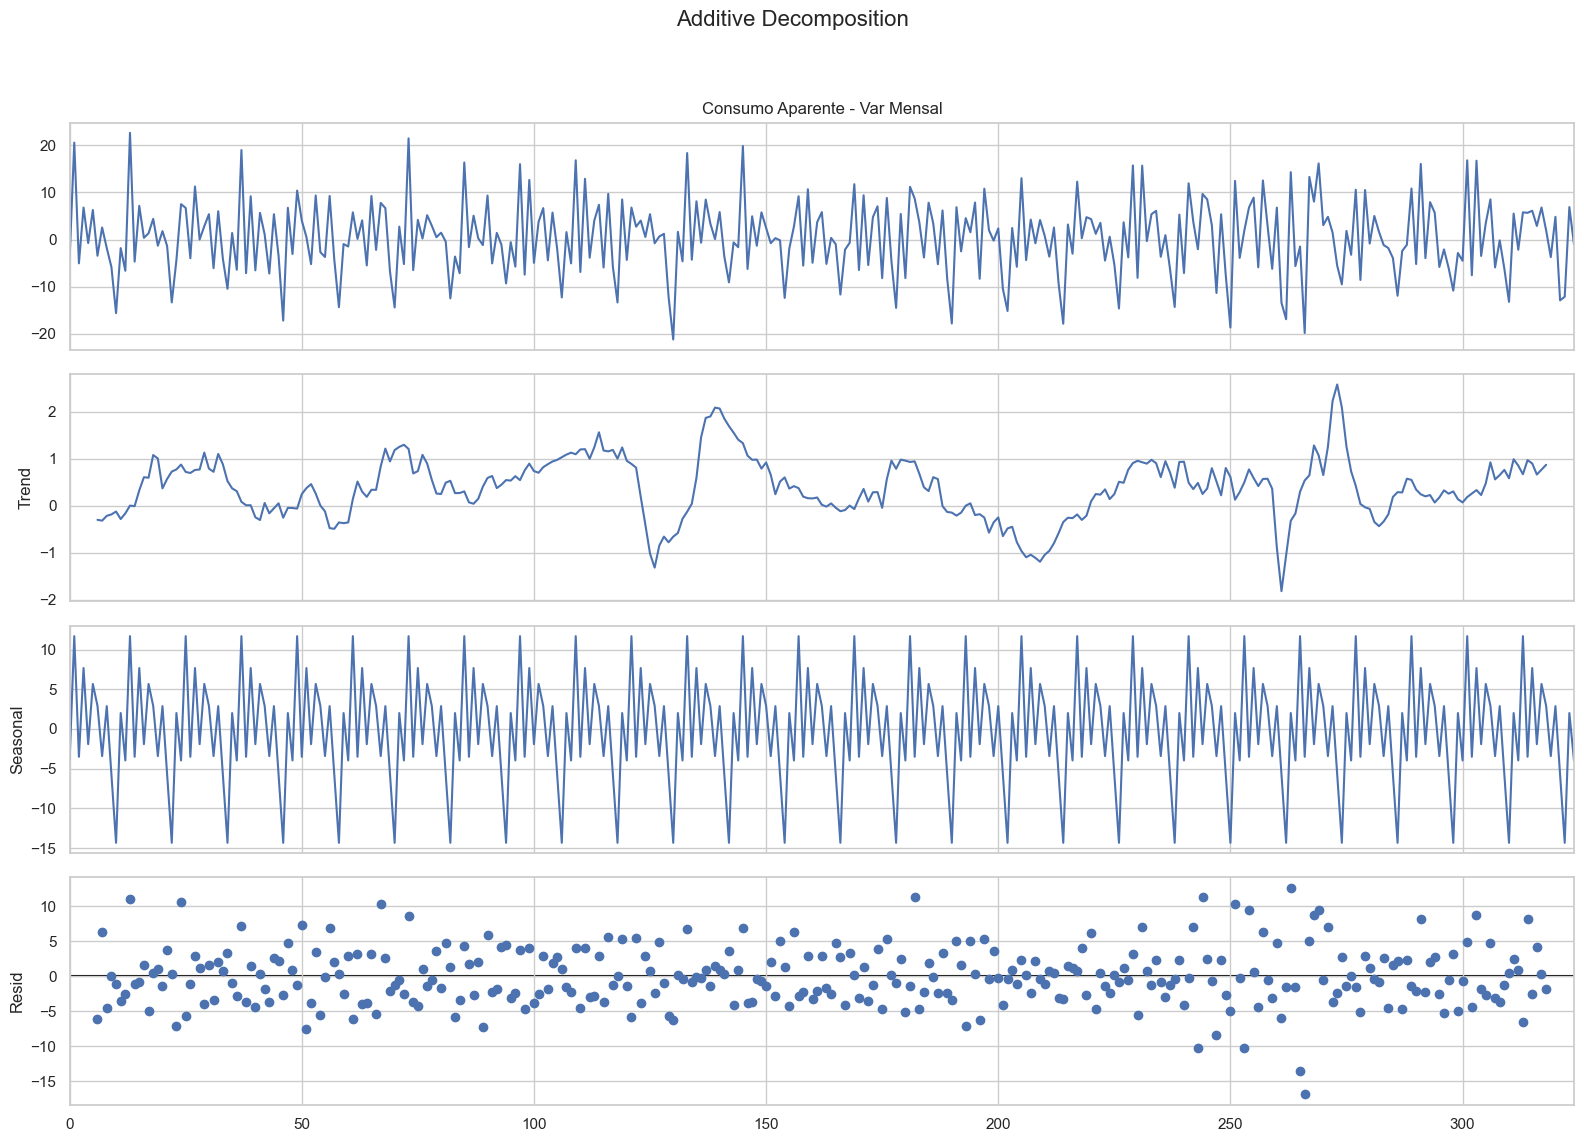

In [37]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

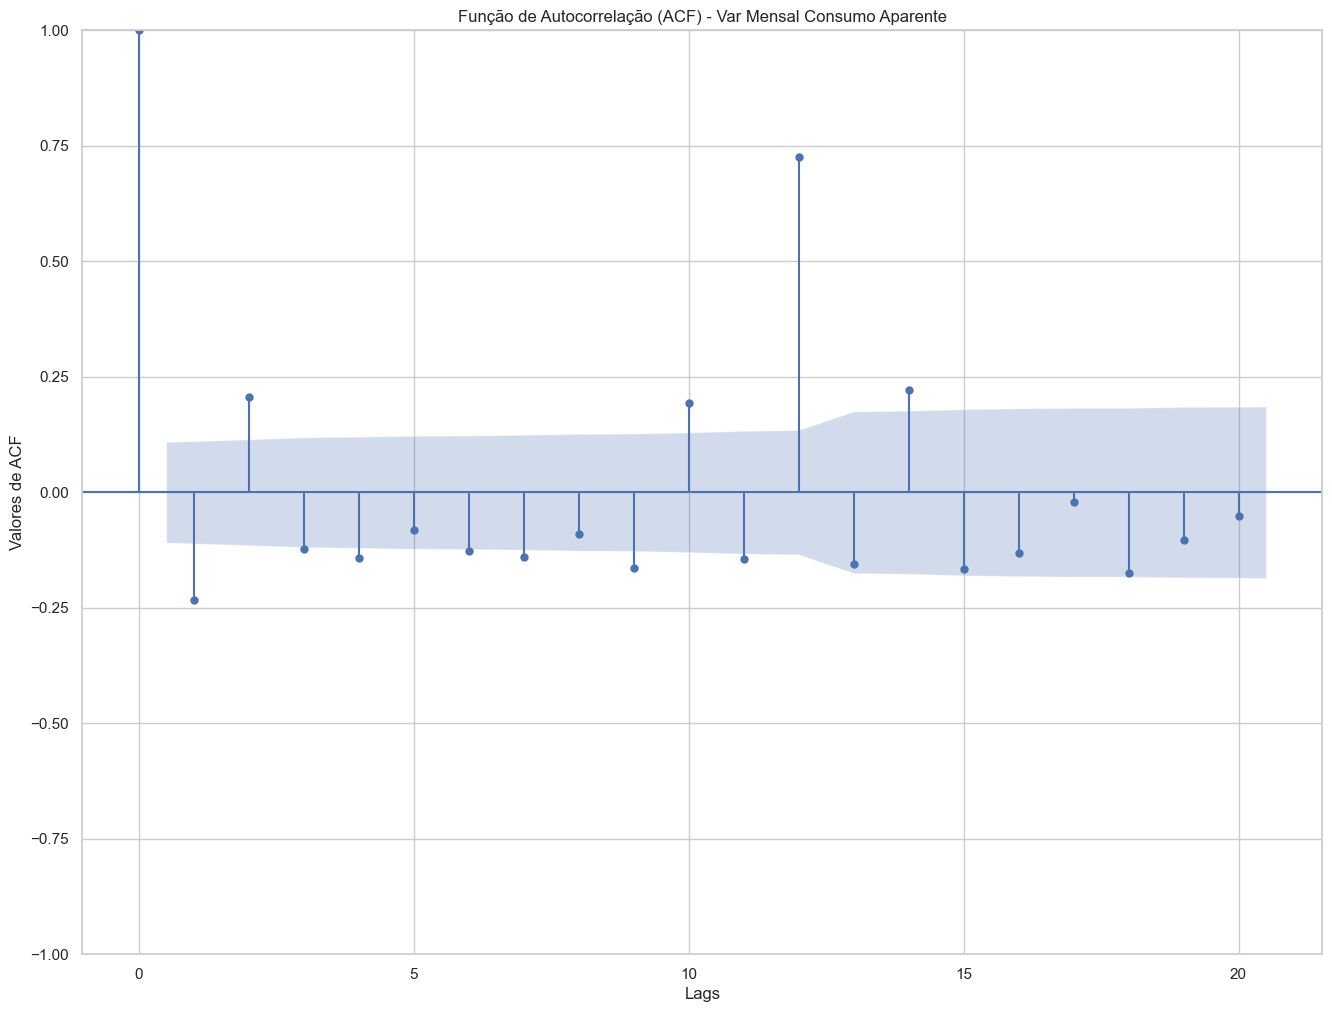

In [38]:
#Gráfico de ACF

plot_acf(df_cons_apar["Consumo Aparente - Var Mensal"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal Consumo Aparente")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

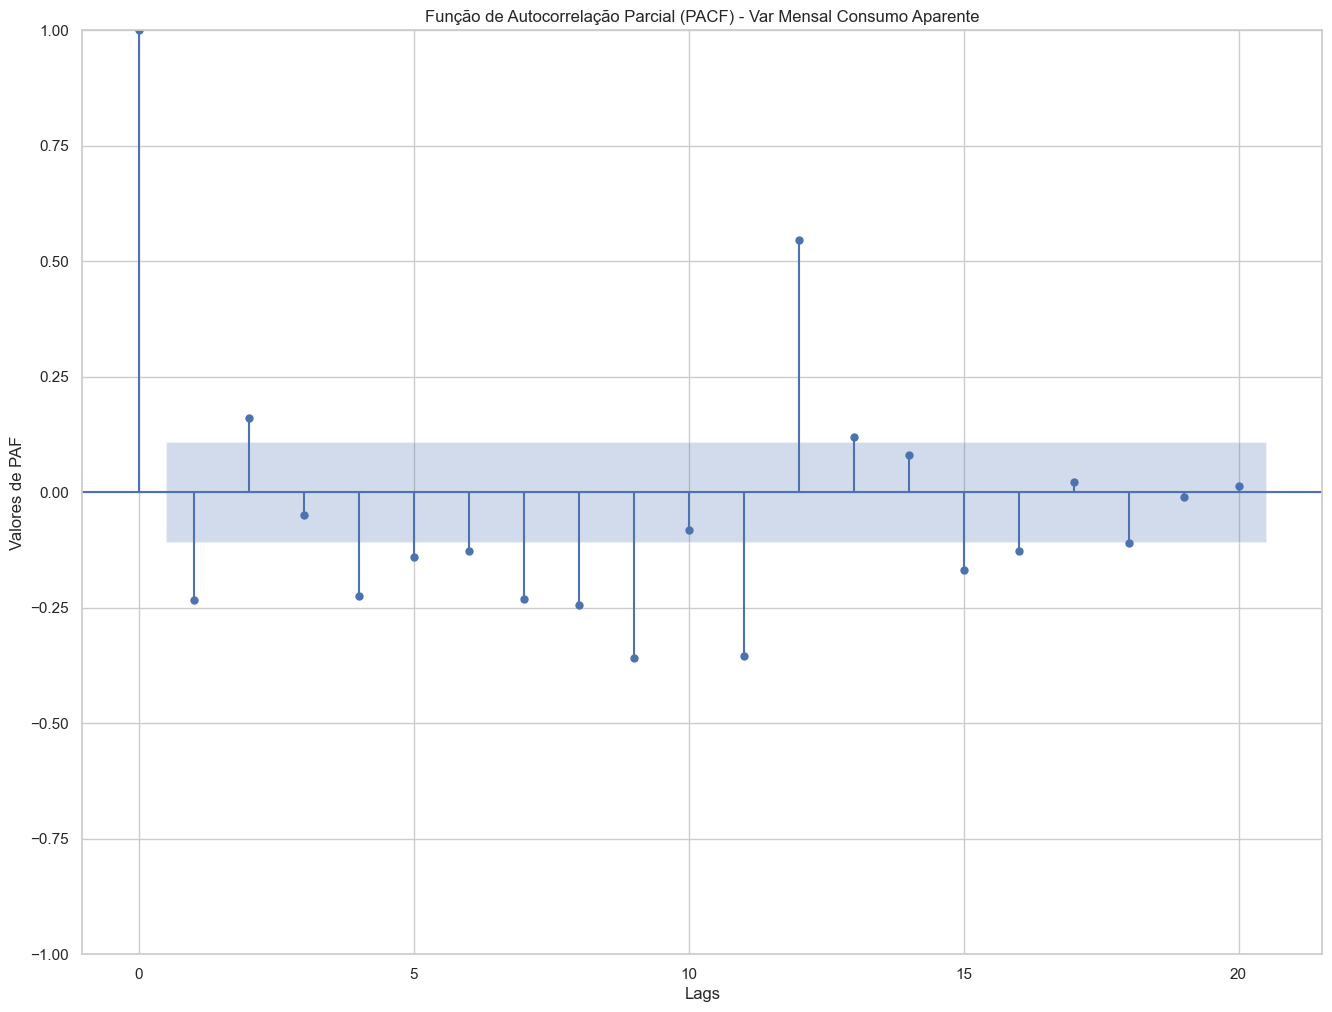

In [39]:
#Gráfico de PACF

plot_pacf(df_cons_apar["Consumo Aparente - Var Mensal"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal Consumo Aparente")
plt.xlabel("Lags")
plt.ylabel("Valores de PAF")
plt.show()

## Consumo Aparente da Ind. Transformação - Variação Mensal % (DESSAZONALIZADO)

### Gráficos da Série Temporal da Variação Mensal do Consumo Aparente (dessazonalizado)

In [40]:
df_cons_apar.columns

Index(['Mês', 'Consumo Aparente - Número índice',
       'Consumo Aparente Dessazonal - Número Índice',
       'Consumo Aparente - Var Mensal',
       'Consumo Aparente Dessazonal - Var Mensal %'],
      dtype='object')

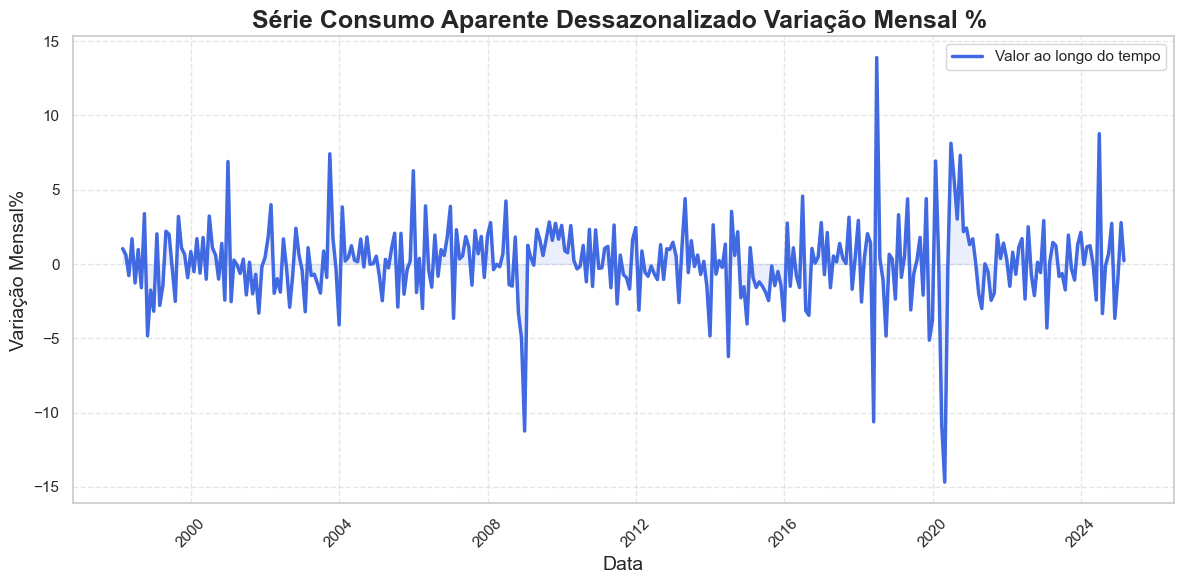

In [43]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_cons_apar["Mês"], df_cons_apar["Consumo Aparente Dessazonal - Var Mensal %"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df_cons_apar["Mês"], df_cons_apar["Consumo Aparente Dessazonal - Var Mensal %"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série Consumo Aparente Dessazonalizado Variação Mensal % ', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Avaliação de Estacionariedade da Série

In [44]:
#Teste de ADF - Variação Mensal do Consumo Aparente Dessazonalizado

resultado = adfuller(df_cons_apar["Consumo Aparente Dessazonal - Var Mensal %"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -19.276523
p-value: 0.000000
Valores Críticos:
	1%: -3.451
	5%: -2.871
	10%: -2.572


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, se rejeita a hipótese nula de que a série do Consumo Aparente Dessazonalizado - Variação Mensal não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [45]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_cons_apar["Consumo Aparente Dessazonal - Var Mensal %"], model='additive', period = 12)

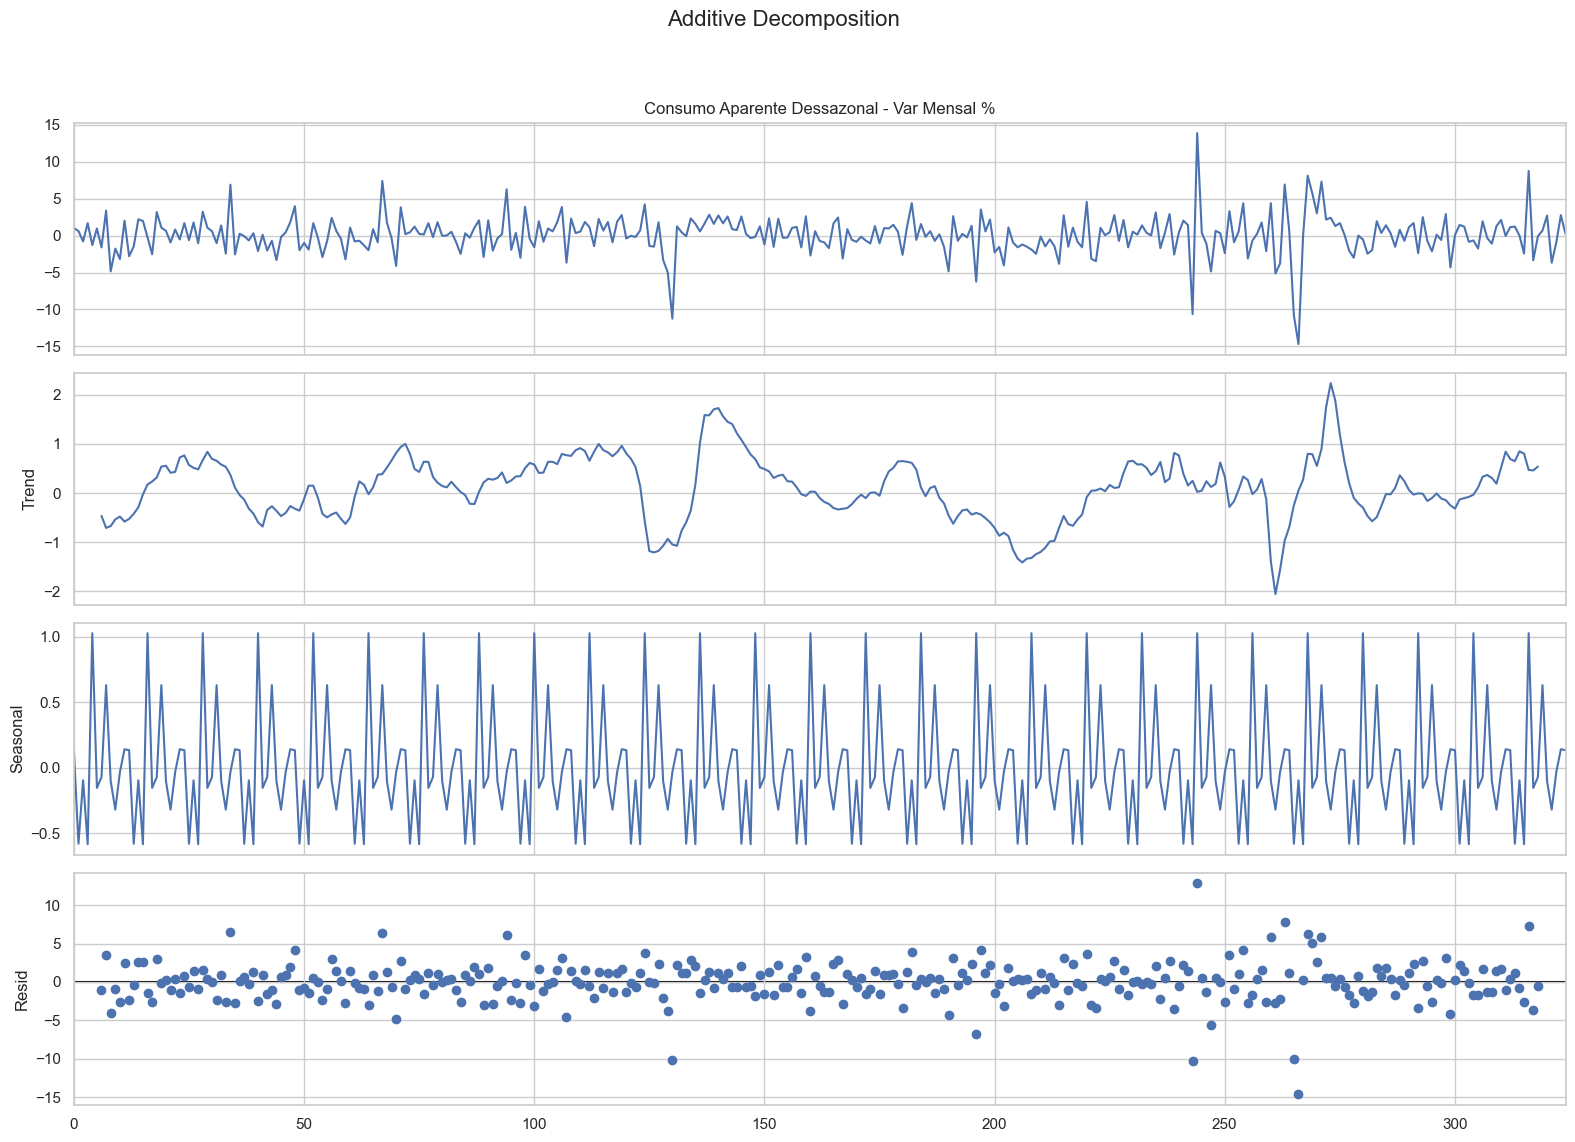

In [46]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

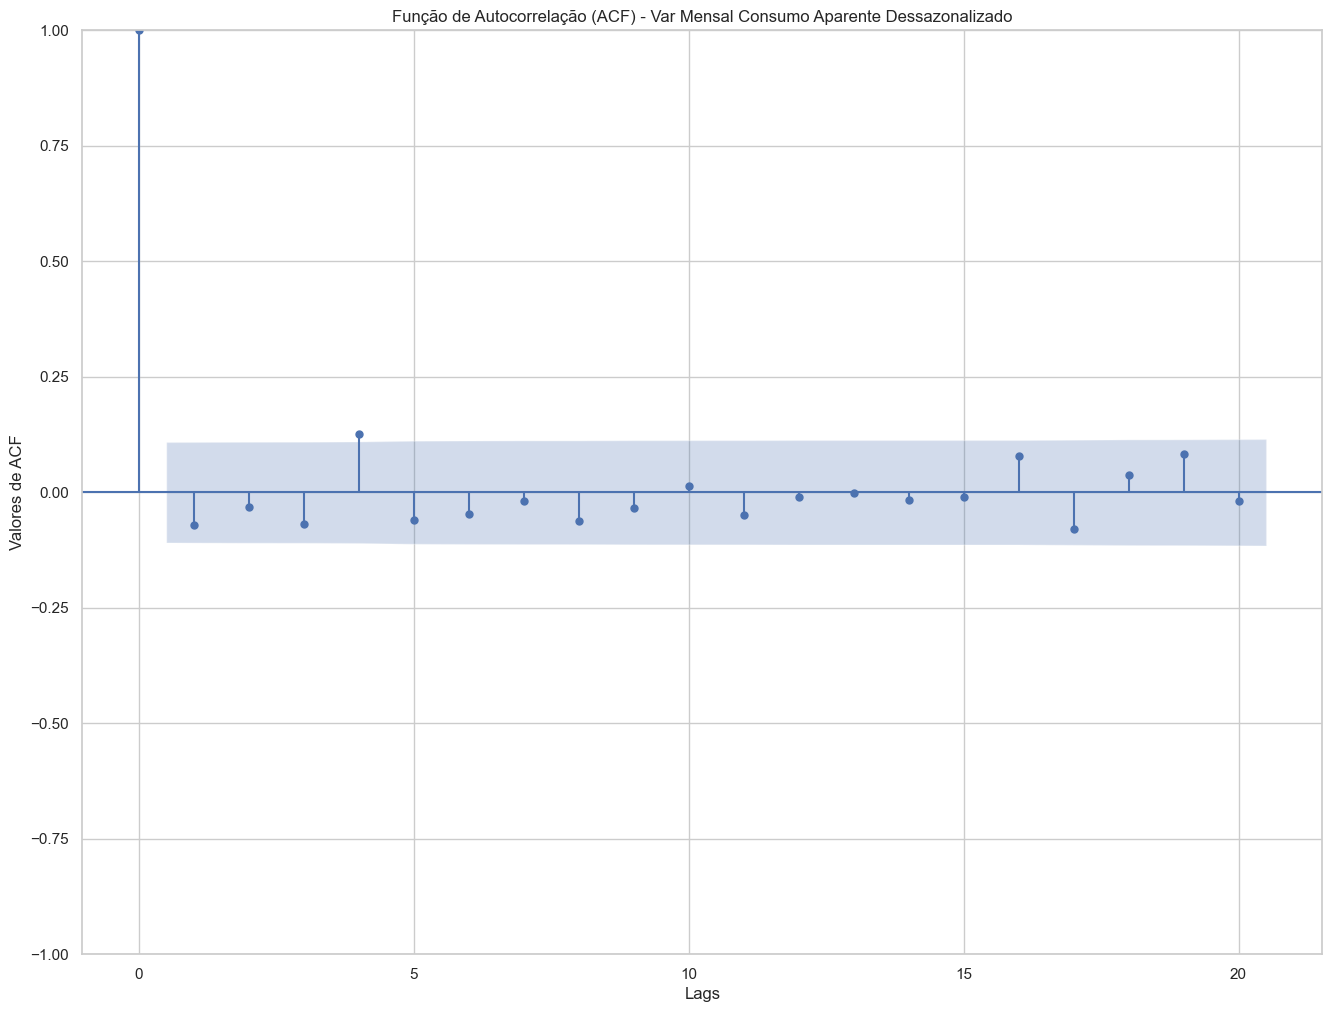

In [48]:
#Gráfico de ACF

plot_acf(df_cons_apar["Consumo Aparente Dessazonal - Var Mensal %"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal Consumo Aparente Dessazonalizado")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

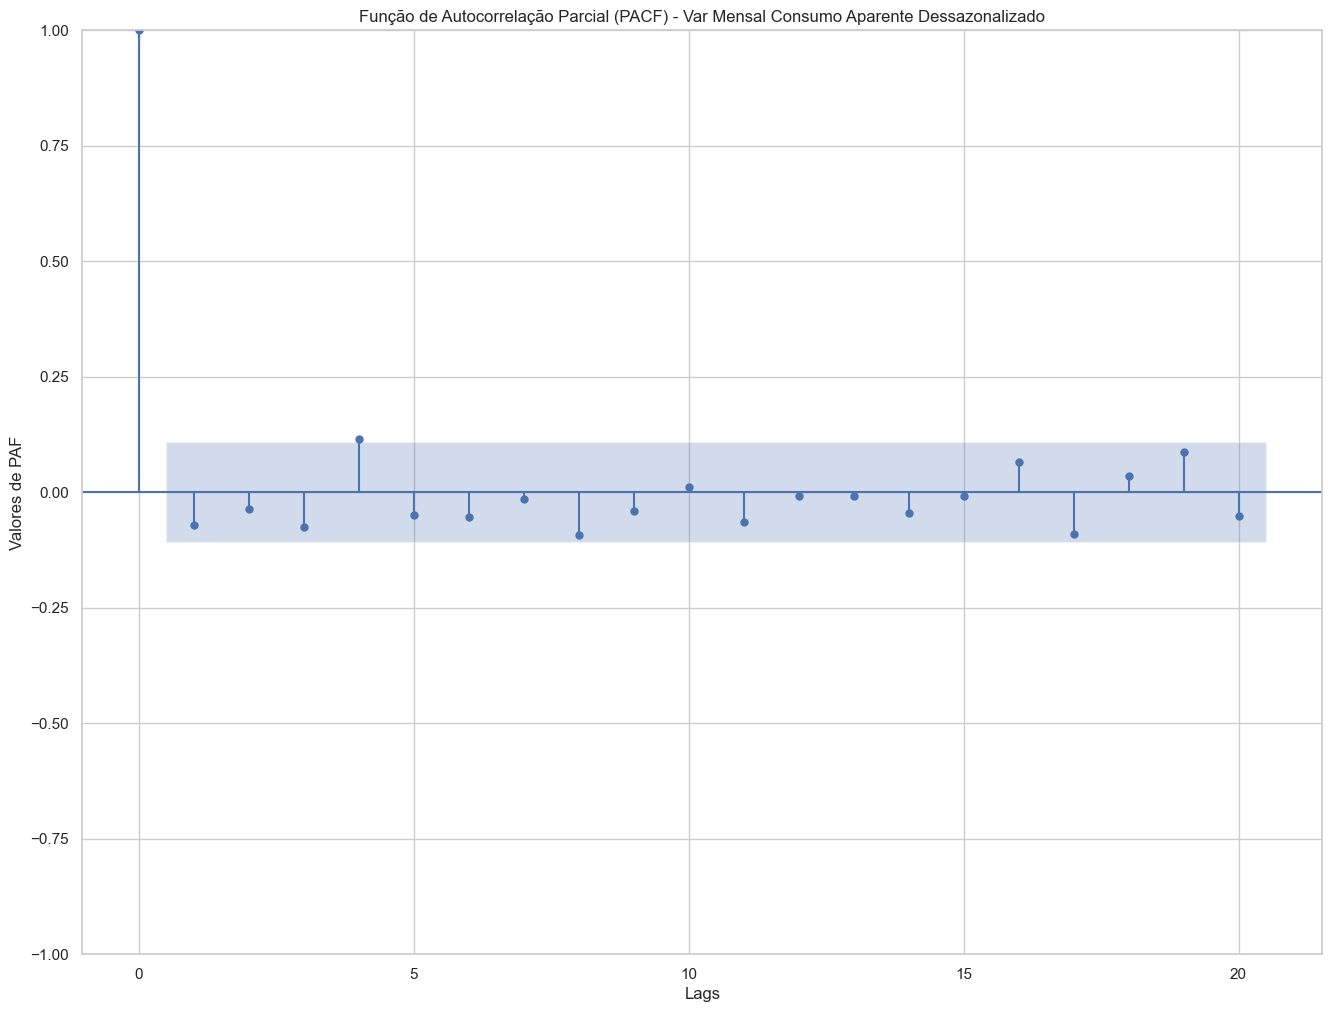

In [49]:
#Gráfico de PACF

plot_pacf(df_cons_apar["Consumo Aparente Dessazonal - Var Mensal %"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal Consumo Aparente Dessazonalizado")
plt.xlabel("Lags")
plt.ylabel("Valores de PAF")
plt.show()

### Criação de base de dados em formato csv

In [50]:
df_cons_apar.to_csv("base_dados_cons_apar.csv", index=False)